In [ ]:
#FIFA 23 Official Dataset Overview
This dataset contains detailed information on 17,660 players from FIFA 23, with 29 columns capturing various attributes.

#KEY COLUMNS:
1) Basic Information:
ID: Unique player ID
Name: Player’s name
Age: Player's age
Nationality: Country of origin
Club: Team the player is associated with
Position: Playing position

2) Player Ratings:
Overall: Overall rating (skill level)
Potential: Future potential rating
Skill Moves: Player’s skill rating (e.g., dribbling tricks)
Weak Foot: Rating of weaker foot ability

3) Contract & Transfer Information:
Value: Estimated market value
Wage: Weekly salary
Release Clause: Buyout clause for transfers
Contract Valid Until: Contract expiration year

4)Physical & Gameplay Attributes:
Height: Player’s height
Weight: Player’s weight
Preferred Foot: Left/Right-footed
Work Rate: Work rate in offense and defense

5)Miscellaneous:
International Reputation: Popularity on an international level
Real Face: Whether a real face model exists in the game
Loaned From: If the player is currently on loan

Observations:
Some columns, like Best Overall Rating, have very few non-null values.
The Value and Wage columns are stored as text (e.g., €157M), requiring conversion for analysis.
Club details are missing for some players, likely free agents.

In [3]:
#  Data Handling & Preprocessing
import pandas as pd  # Alias for Pandas
import numpy as np  # Alias for NumPy

#  Data Visualization
import matplotlib.pyplot as plt  # Alias for Matplotlib
import seaborn as sns  # Alias for Seaborn

import warnings
warnings.filterwarnings("ignore")


In [5]:
df=pd.read_csv(r"C:\Users\vaibh\OneDrive\Desktop\File\FIFA23_official_data.csv")

In [7]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


In [9]:
df.tail()


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190cm,78kg,€218K,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195cm,84kg,€188K,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190cm,82kg,€142K,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187cm,79kg,€214K,40.0,NaN
17659,256376,21 F. Jakobsson,20,https://cdn.sofifa.net/players/256/376/21_60.png,Sweden,https://cdn.sofifa.net/flags/se.png,50,61,IFK Norrköping,https://cdn.sofifa.net/teams/702/30.png,...,No,"<span class=""pos pos29"">RES","Jan 8, 2020",NaN,2021,186cm,78kg,€131K,30.0,NaN


In [19]:
#To know total rows and columns
df.shape

(17660, 29)

In [21]:
#checking  missing values (NaNs) in each column of the dataset.
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          211
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                      38
Real Face                      38
Position                       35
Joined                       1098
Loaned From                 16966
Contract Valid Until          361
Height                          0
Weight                          0
Release Clause               1151
Kit Number                     35
Best Overall Rating         17639
dtype: int64

In [23]:
df.isnull().sum().sum()

37572

In [25]:
# Calculate percentage of missing values
df.isnull().sum() / df.shape[0] * 100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Photo                        0.000000
Nationality                  0.000000
Flag                         0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.194790
Club Logo                    0.000000
Value                        0.000000
Wage                         0.000000
Special                      0.000000
Preferred Foot               0.000000
International Reputation     0.000000
Weak Foot                    0.000000
Skill Moves                  0.000000
Work Rate                    0.000000
Body Type                    0.215176
Real Face                    0.215176
Position                     0.198188
Joined                       6.217441
Loaned From                 96.070215
Contract Valid Until         2.044168
Height                       0.000000
Weight                       0.000000
Release Clau

In [ ]:
#Handling Missing Values

In [27]:
# Drop columns with too many missing values
df.drop(columns=['Best Overall Rating', 'Loaned From'], inplace=True)

In [29]:
# Fill missing values
df['Club'].fillna('Unknown', inplace=True)
df['Body Type'].fillna('Normal', inplace=True)
df['Position'].fillna('Unknown', inplace=True)
df['Kit Number'].fillna(df['Kit Number'].mode()[0], inplace=True)  # Fill with most common Kit Number


In [ ]:
#Unknown:If a player does not have a club assigned (missing value), we replace it with "Unknown".This is useful because a missing club could mean the player is currently a free agent (not signed with any team).

#Normal:The Body Type column likely describes a player's physical build (e.g., "Lean", "Stocky", "Normal").Missing values are filled with "Normal", assuming it is the most common or default body type.

#Unknown:The Position column indicates where the player plays on the field (e.g., "ST" for Striker, "CM" for Central Midfielder).If a player’s position is missing, we replace it with "Unknown", which helps in analysis instead of leaving blanks.

#Kit Number:Kit Number is the jersey number a player wears (e.g., "10" for Messi).We use .mode()[0] to find the most common kit number in the dataset and fill missing values with it.
     #mode() returns the most frequently occurring value in a column.
     #[0] ensures we take the first most common value (in case multiple exist).


In [31]:
# Display updated missing values count
df.isnull().sum()[df.isnull().sum() > 0]

Real Face                 38
Joined                  1098
Contract Valid Until     361
Release Clause          1151
dtype: int64

In [33]:
# Fill missing 'Real Face' values with "No"

df['Real Face'].fillna("No", inplace=True)


#the 'Real Face' column likely indicates whether a player’s face is realistically scanned into the game or is a generic 3D model.Possible values could be "Yes" (face scanned) or "No" (generic face).
#Logically assumes missing values mean "No".
#Helps avoid data inconsistencies and NaN-related errors.
#ensures smooth data visualization, reporting, and model training.
#Makes analysis more interpretable and accurate.

In [35]:
# Convert 'Joined' to datetime and fill missing values with a placeholder date

df['Joined'] = pd.to_datetime(df['Joined'], errors='coerce')


# The 'Joined' column likely contains dates representing when a player joined their club.
# pd.to_datetime() converts the column into a proper date format (YYYY-MM-DD).
#errors='coerce' ensures that invalid or missing values are converted to NaT (Not a Time, i.e., missing)


In [159]:
# Placeholder for missing dates

df['Joined'].fillna(pd.Timestamp("2000-01-01"), inplace=True)  

# Missing dates (NaT) are replaced with "2000-01-01".This ensures no missing values while keeping a clear distinction.

In [37]:
# Convert 'Contract Valid Until' to numeric and fill missing values with the most common year

df['Contract Valid Until'] = pd.to_numeric(df['Contract Valid Until'], errors='coerce')
df['Contract Valid Until'].fillna(df['Contract Valid Until'].mode()[0], inplace=True)

#The 'Contract Valid Until' column likely represents the year a player's contract expires (e.g., 2024, 2025, etc.).
#Some values may be in an incorrect format (e.g., "N/A", "-", or missing).
#pd.to_numeric() converts the column to numeric (integer) format, making it easier for analysis.
# errors='coerce' ensures that Invalid values (non-numeric) are converted to NaN (missing values).

#Missing values (NaN) are replaced with the most frequent contract expiry year.
#mode() finds the most common value in the column (e.g., if most players have a contract until 2025, it returns 2025).
#[0] ensures that we select the first mode value (in case of multiple common values).

In [ ]:
#Data Cleaning & Transformation

In [39]:
# Convert 'Release Clause' to numeric (remove currency symbols and convert to millions)

df['Release Clause'] = df['Release Clause'].astype(str).str.replace('€', '').str.replace('M', '').str.replace('K', 'e3')
df['Release Clause'] = pd.to_numeric(df['Release Clause'], errors='coerce')
df['Release Clause'].fillna(df['Release Clause'].median(), inplace=True)


#str.replace('€', '') → Removes the euro sign (€).
#str.replace('M', '') → Removes the "M" (millions).
#str.replace('K', 'e3') → Converts "K" (thousands) to scientific notation (e3 = ×1000)

#Converts the cleaned values into proper numeric format (float or int).
# errors='coerce' ensures that invalid values (like empty strings or non-numeric data) are converted to NaN (missing).

#Missing values (NaN) are replaced with the median value of the 'Release Clause' column.
#Median is more robust to extreme values (outliers).
#Some players (like Messi or Ronaldo) have very high release clauses, which would skew the mean.
#The median provides a more balanced replacement for missing values.

In [41]:
# Check if any missing values remain
df.isnull().sum().sum()

1098

In [ ]:
#Data Visualization & Insights

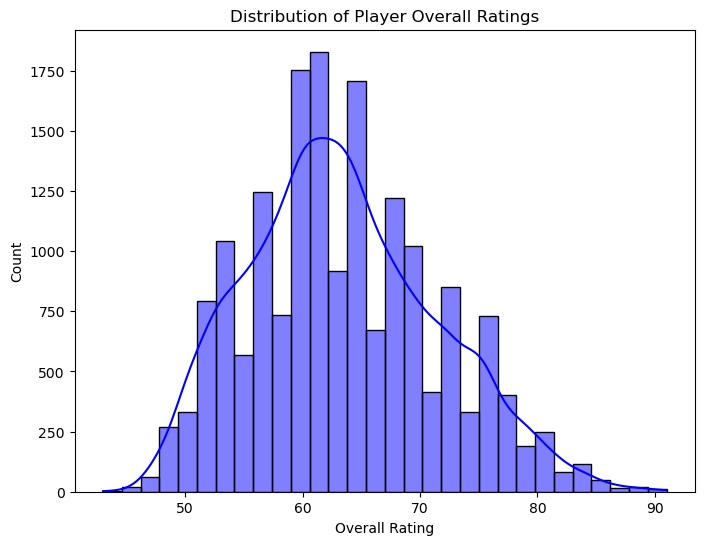

In [43]:
# Plot histogram for Overall Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Overall'], bins=30, kde=True, color='blue')
plt.title('Distribution of Player Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

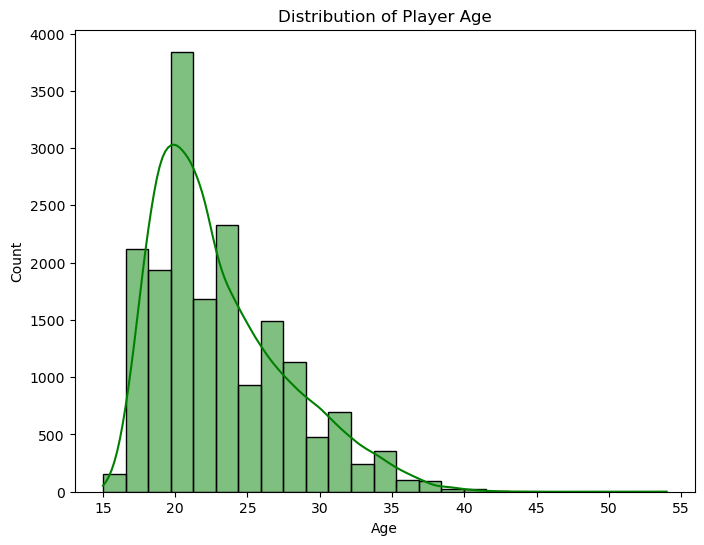

In [45]:
# Plot histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=25, kde=True, color='green')
plt.title('Distribution of Player Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

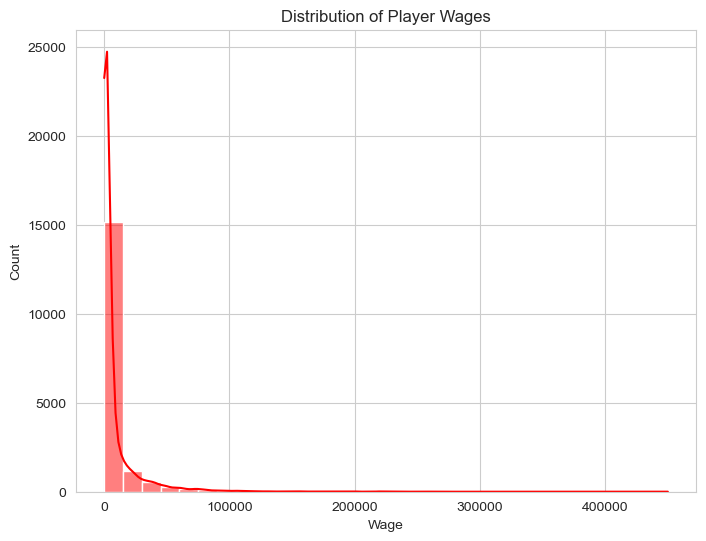

In [181]:
# Plot histogram for Wage
plt.figure(figsize=(8, 6))
sns.histplot(df['Wage'], bins=30, kde=True, color='red')
plt.title('Distribution of Player Wages')
plt.xlabel('Wage')
plt.ylabel('Count')
plt.show()

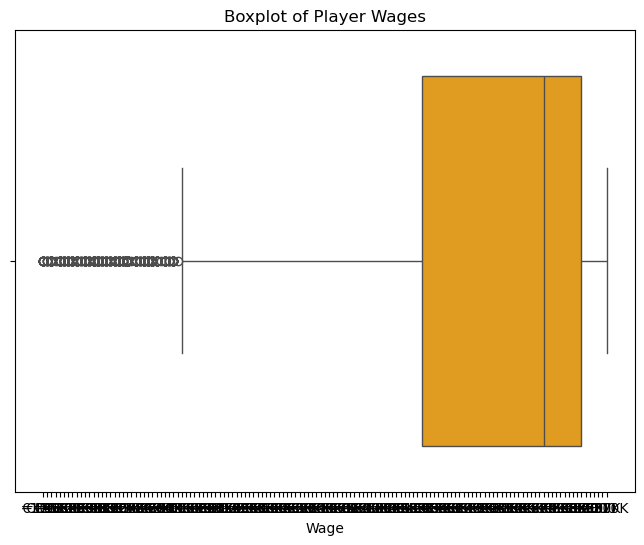

In [47]:
# Boxplot for Wages
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Wage'], color='orange')
plt.title('Boxplot of Player Wages')
plt.xlabel('Wage')
plt.show()


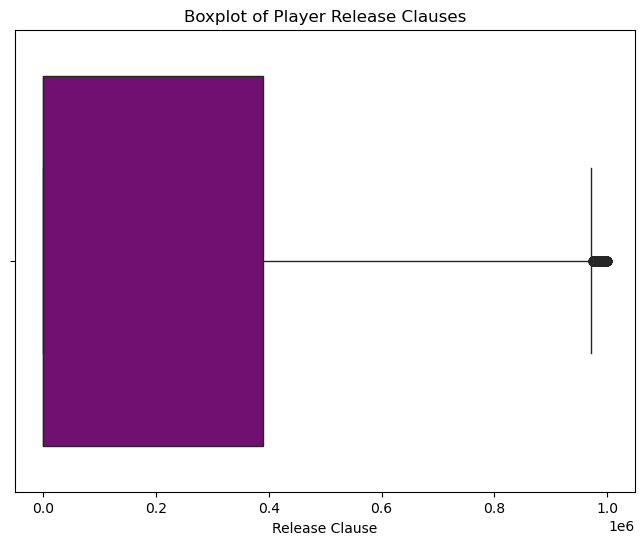

In [49]:
# Boxplot for Release Clause
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Release Clause'], color='purple')
plt.title('Boxplot of Player Release Clauses')
plt.xlabel('Release Clause')
plt.show()

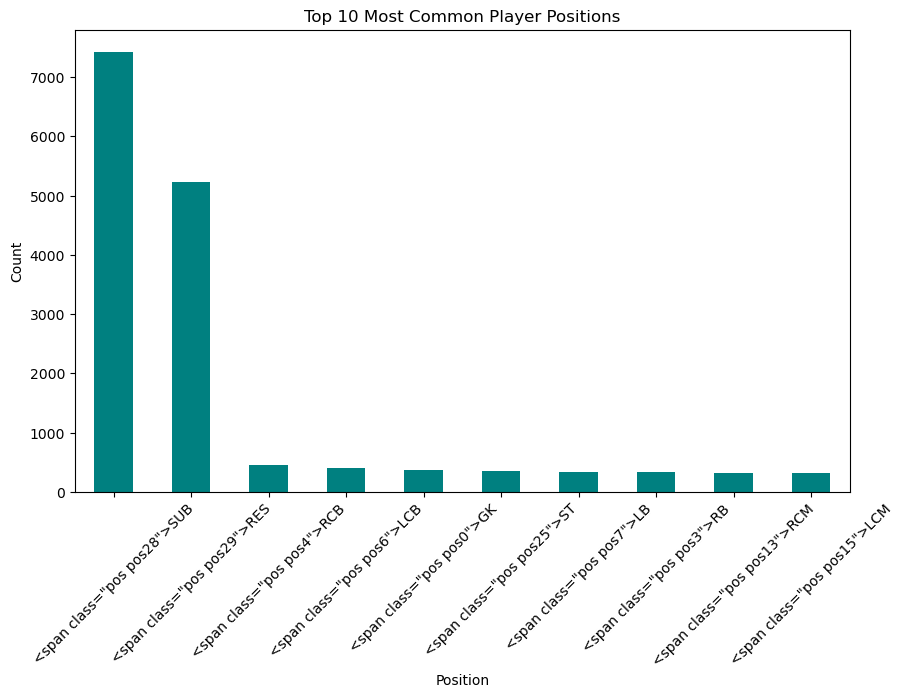

In [51]:
plt.figure(figsize=(10, 6))
df['Position'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Most Common Player Positions")
plt.xlabel("Position")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


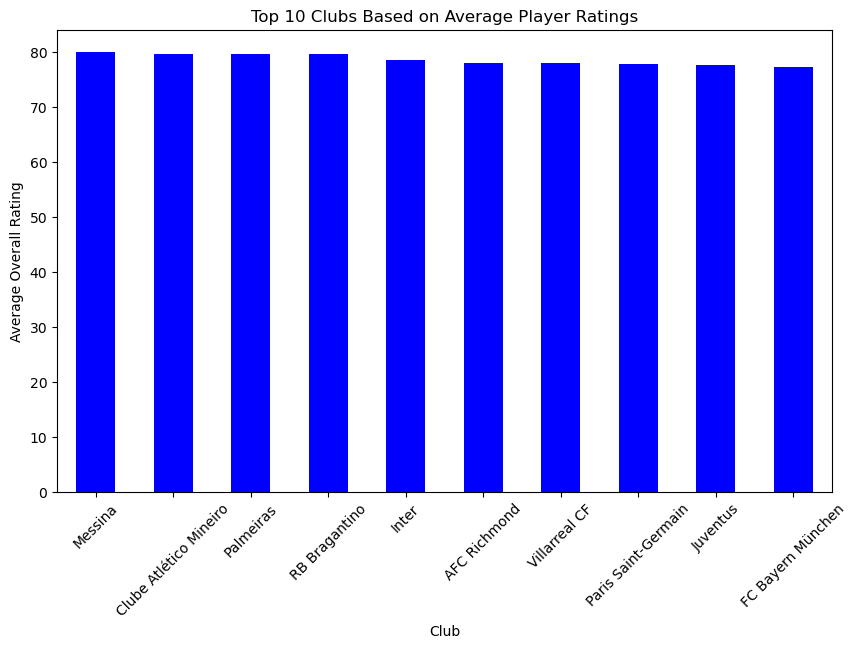

In [57]:
top_clubs = df.groupby('Club')['Overall'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_clubs.plot(kind='bar', color='blue')
plt.title("Top 10 Clubs Based on Average Player Ratings")
plt.xlabel("Club")
plt.ylabel("Average Overall Rating")
plt.xticks(rotation=45)
plt.show()


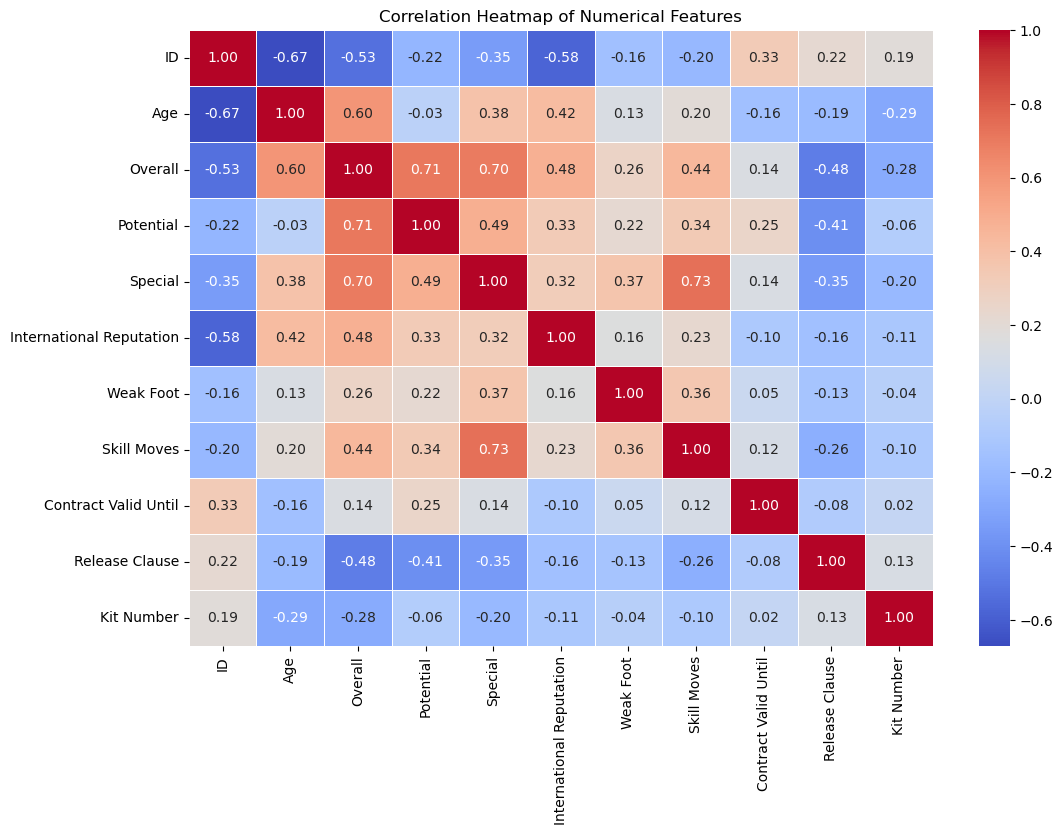

In [61]:
# Generate the heatmap

# Ensure numeric_df is properly defined
numeric_df = df.select_dtypes(include=['number'])  # Select only numerical columns

# Generate the heatmap again
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [ ]:
#Advanced Analysis & Insights

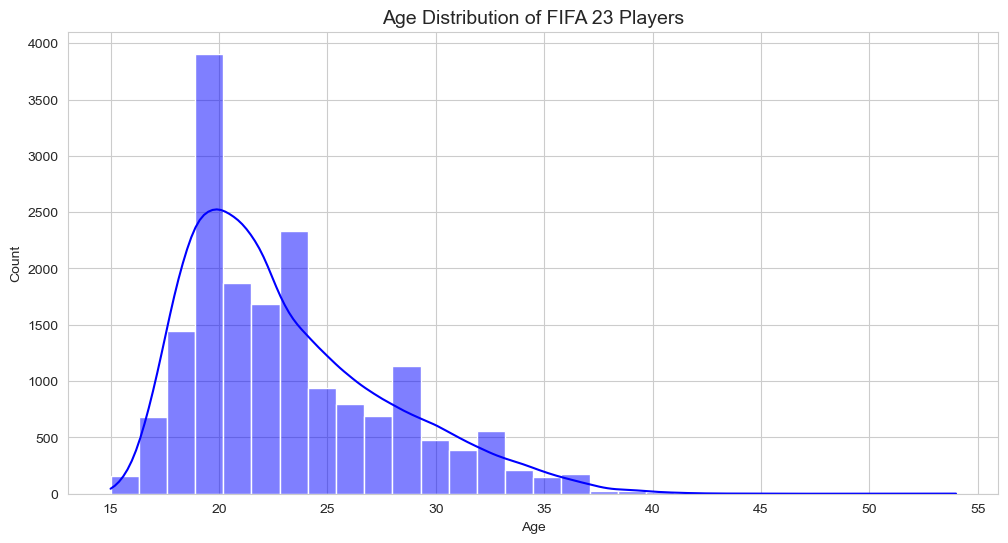

In [63]:

# Set style for plots
sns.set_style("whitegrid")

# Figure size
plt.figure(figsize=(12, 6))

# 1. Age Distribution
sns.histplot(df['Age'], bins=30, kde=True, color="blue")
plt.title("Age Distribution of FIFA 23 Players", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()



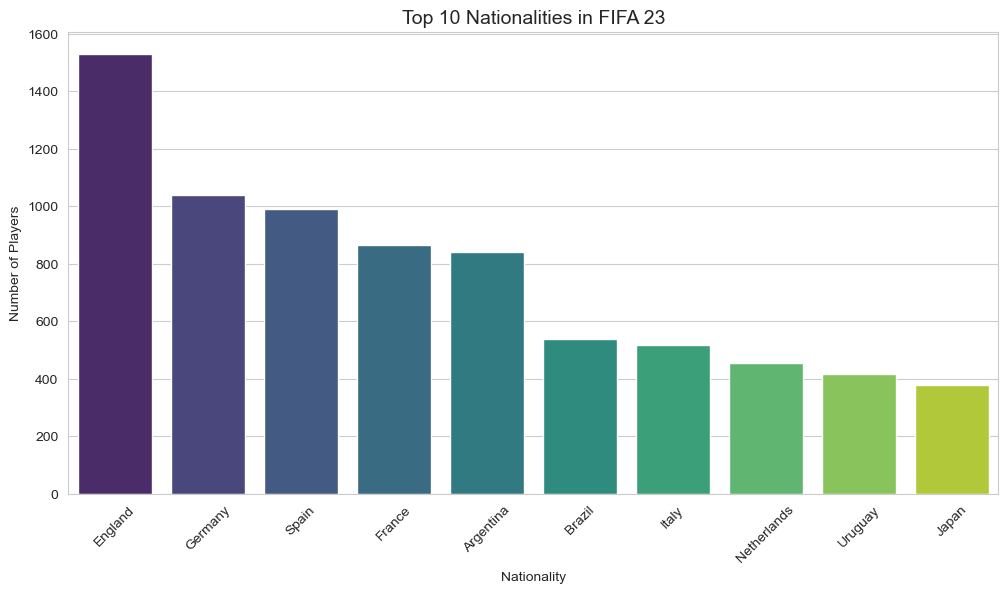

In [65]:
#  Top 10 Nationalities

plt.figure(figsize=(12, 6))
top_nationalities = df['Nationality'].value_counts().head(10)
sns.barplot(x=top_nationalities.index, y=top_nationalities.values, palette="viridis")
plt.title("Top 10 Nationalities in FIFA 23", fontsize=14)
plt.xlabel("Nationality")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.show()


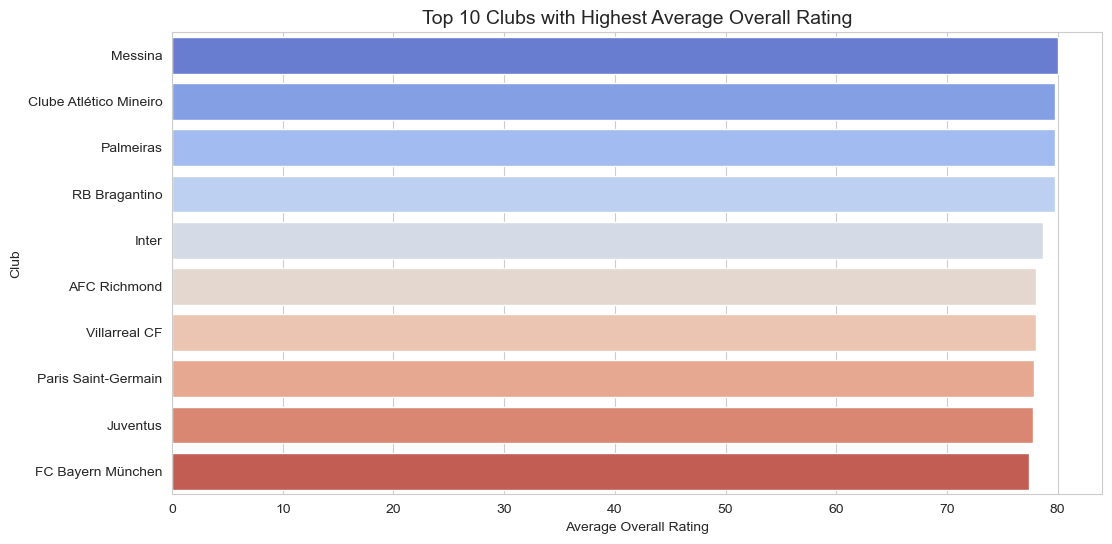

In [69]:
# Top 10 Clubs with Highest Average Overall Rating
top_clubs = df.groupby("Club")["Overall"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_clubs.values, y=top_clubs.index, palette="coolwarm")
plt.title("Top 10 Clubs with Highest Average Overall Rating", fontsize=14)
plt.xlabel("Average Overall Rating")
plt.ylabel("Club")
plt.show()


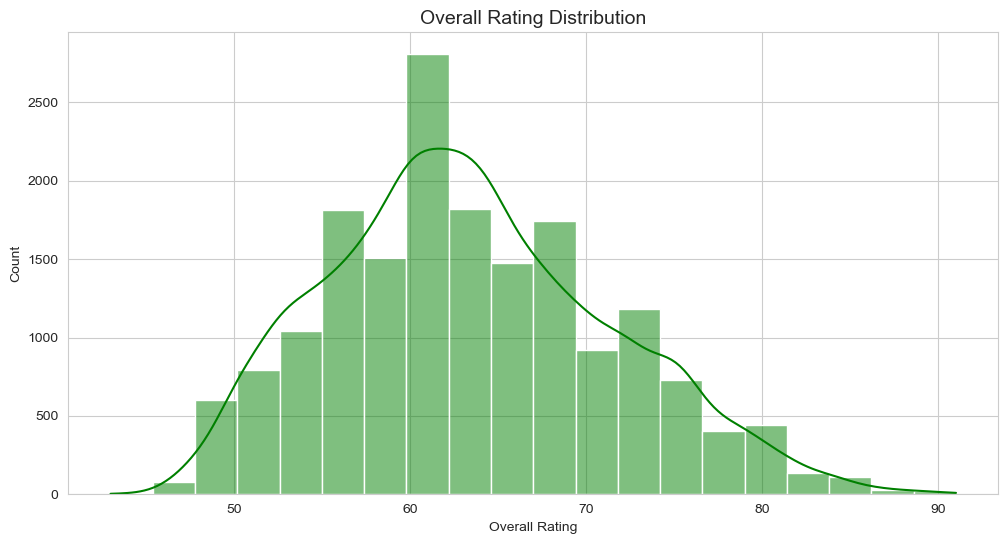

In [149]:
# 4. Overall Rating Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Overall'], bins=20, kde=True, color="green")
plt.title("Overall Rating Distribution", fontsize=14)
plt.xlabel("Overall Rating")
plt.ylabel("Count")
plt.show()


In [71]:
# Convert 'Value' and 'Wage' columns to numeric format (removing € and converting K/M values)
df['Value'] = df['Value'].str.replace('€', '').str.replace('M', '').str.replace('K', 'e3')
df['Wage'] = df['Wage'].str.replace('€', '').str.replace('M', '').str.replace('K', 'e3')

df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df['Wage'] = pd.to_numeric(df['Wage'], errors='coerce')

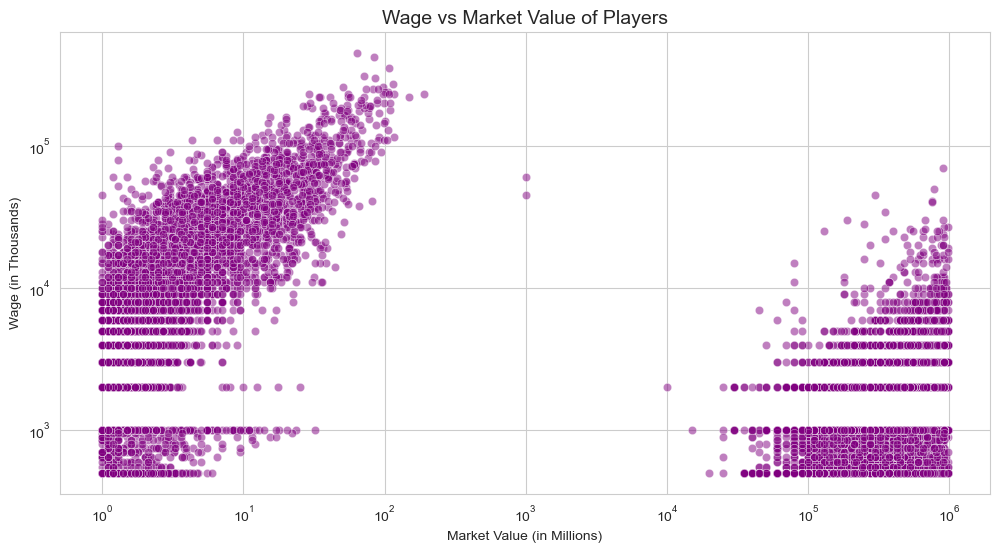

In [73]:
# Scatter plot: Wage vs Market Value
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Value'], y=df['Wage'], alpha=0.5, color="purple")
plt.title("Wage vs Market Value of Players", fontsize=14)
plt.xlabel("Market Value (in Millions)")
plt.ylabel("Wage (in Thousands)")
plt.xscale('log')  # Log scale to handle large value differences
plt.yscale('log')
plt.show()